In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from struct import unpack
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, gzip, numpy



In [2]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


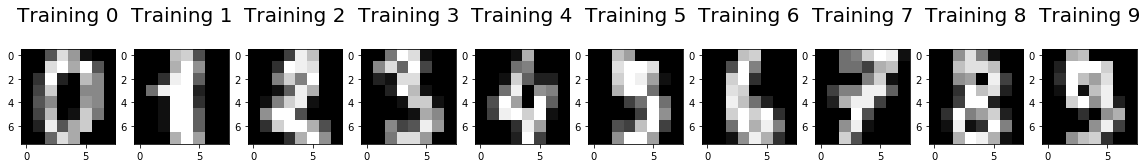

In [3]:
#Dataset
plt.figure(figsize=(20,4))
for i,(image,label) in enumerate(zip(digits.data[0:10],digits.target[0:10])):
    plt.subplot(1,10,i+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title("Training %i\n" % label,fontsize=20)

In [4]:
x_train,x_test,y_train,y_test= train_test_split(
digits.data,digits.target,test_size=0.25)

print('X train set size:', x_train.shape)
print('Y train set size: ',y_train.shape)
print('X test set size:', x_test.shape)
print('Y test set size: ',y_test.shape)

X train set size: (1347, 64)
Y train set size:  (1347,)
X test set size: (450, 64)
Y test set size:  (450,)


In [5]:
clf = LogisticRegression()
clf.fit(x_train,y_train)
print(x_test[0])
print(x_test[0].reshape(1,-1))
clf.predict(x_test[0].reshape(1,-1))

[ 0.  0.  4. 13. 14.  8.  0.  0.  0.  3. 14.  3.  1. 16.  3.  0.  0.  7.
  9.  0.  0. 14.  6.  0.  0.  8.  4.  0.  0. 16.  4.  0.  0.  8.  6.  0.
  0. 16.  0.  0.  0.  3. 11.  0.  1. 14.  0.  0.  0.  0. 12.  4.  6. 11.
  0.  0.  0.  0.  5. 16. 14.  1.  0.  0.]
[[ 0.  0.  4. 13. 14.  8.  0.  0.  0.  3. 14.  3.  1. 16.  3.  0.  0.  7.
   9.  0.  0. 14.  6.  0.  0.  8.  4.  0.  0. 16.  4.  0.  0.  8.  6.  0.
   0. 16.  0.  0.  0.  3. 11.  0.  1. 14.  0.  0.  0.  0. 12.  4.  6. 11.
   0.  0.  0.  0.  5. 16. 14.  1.  0.  0.]]


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([0])

In [6]:
clf.predict(x_test[0:5])

array([0, 4, 9, 0, 0])

In [7]:
predictions = clf.predict(x_test)

In [8]:
#Accuracy
accuracy = clf.score(x_test,y_test)
print('Accuracy',accuracy)

Accuracy 0.9422222222222222


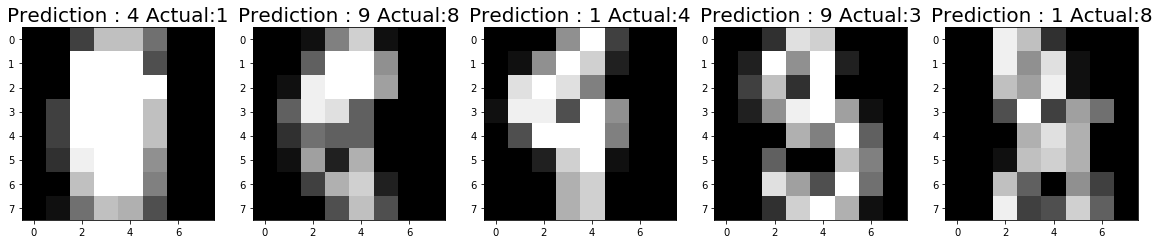

In [9]:
#Wrong predictions
i = 0 
wrongClassification = [] 
for predict,actual in zip(predictions,y_test): 
    if predict!=actual: 
        wrongClassification.append(i) 
    i+=1
    
plt.figure(figsize=(20,4))
for i , x in enumerate(wrongClassification[:5]): 
    plt.subplot(1,5,i+1) 
    plt.imshow(np.reshape(x_test[x],(8,8)),cmap=plt.cm.gray) 
    plt.title('Prediction : {} Actual:{}'.format(predictions[x],y_test[x]),fontsize=20)

In [10]:
# Load the mnist dataset
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = pickle.load(f,encoding='latin1')
f.close()

In [11]:
print(train_set)

(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([5, 0, 4, ..., 8, 4, 8], dtype=int64))


In [12]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = gzip.open(imagefile, 'rb')
    labels = gzip.open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [13]:
train_img, train_label = loadmnist('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')
test_img, test_label = loadmnist('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')
print(train_img.shape)
print(train_label.shape)
print(test_img.shape)
print(test_label.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [19]:
clf = LogisticRegression(solver='lbfgs',max_iter=10000)
clf.fit(train_img,train_label)
predictions = clf.predict(test_img)
print(clf.score(test_img,test_label))

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\

0.9167


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


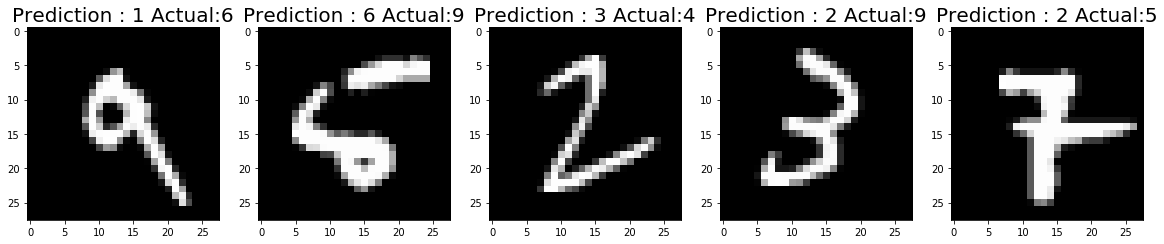

In [24]:
i = 0 
wrongClassification = [] 
for predict,actual in zip(test_label,predictions): 
    if predict!=actual: 
        wrongClassification.append(i) 
    i+=1
    
plt.figure(figsize=(20,4))
for i , x in enumerate(wrongClassification[:5]): 
    plt.subplot(1,5,i+1) 
    plt.imshow(np.reshape(test_img[x],(28,28)),cmap=plt.cm.gray) 
    plt.title('Prediction : {} Actual:{}'.format(predictions[x],y_test[x]),fontsize=20)